### anomaly detection in time series data with python
in this notebook we will learn all about anomaly detection teqniques, regrding time series data,and how to implement them in python
the notebook is diveided into the following sections:
- importing the necessary libraries and data
- data exploration and visualization 
- data cleaning and preparation 
- anomaly detection predictions
- anomaly detection using supervised techniques
- anomaly detection using unsupervised techniques
- anomaly detection using hybrid techniques


### here are the main steps:
#### 1. Problem Definition
Objective: Clearly define what constitutes an anomaly in the context of water industry data (e.g., unusual water usage, leak detection).
Constraints: Consider real-time processing needs, data availability, and computational resources.

#### 2. Data Collection
Sources: Gather historical data from sensors, meters, weather reports, etc.
Volume: Ensure a sufficient quantity of data for training and validation.
Challenges: Time series data often has temporal dependencies, missing values, and may come from heterogeneous sources.

#### 3. Data Preprocessing
Cleaning: Handle missing values, outliers, and erroneous data entries.
Normalization/Standardization: Scale data appropriately if using algorithms sensitive to data scale.
Feature Engineering: Create time-based features (e.g., rolling averages, time lags).
Resampling: Adjust data frequency (hourly, daily) based on analysis needs.

#### 4. Exploratory Data Analysis (EDA)
Trend Analysis: Look for underlying trends.
Seasonality: Identify seasonal patterns typical in water usage.
Correlation Analysis: Examine relationships between different variables.
Visualization: Use time series plots, autocorrelation plots to understand data characteristics.

#### 5. make predictions
##### now we can start the prediction process,we will explore the following techniques:
- Threshold-based: Define thresholds for anomalies based on historical data.
- Machine Learning: Employ supervised/unsupervised learning for anomaly detections.
##### supervised learning approaches:
##### regression-based anomaly detection:
in this approach we will use regression models to predict the value of the next time step, and compare it to the actual value. if the difference between the predicted and actual values is large, then we can flag an anomaly.
commun used regression models for regression-based anomaly detection are:
- SARIMA, ARIMA
- Prophet
- LSTM, GRU

##### classification-based anomaly detection:
in this approach we will use classification models to predict whether a data point is normal or anomalous. we can use a binary classifier to label data points as normal or anomalous, or a multi-class classifier to label data points as belonging to one of several classes (e.g., normal, minor anomaly, major anomaly).
commun used classification models for classification-based anomaly detection are:
- Logistic Regression
- Random Forest
- SVM

##### unsupervised learning approaches:
in this approach we will use unsupervised learning models to identify patterns in the data that do not conform to expected behavior. we can use clustering algorithms to group data points into clusters based on similarity, and identify any clusters that are dissimilar to the rest of the data. alternatively, we can use density estimation algorithms to identify regions of the data that have a low probability of occurrence, and flag data points in these regions as anomalies.
commun used unsupervised learning models for anomaly detection are:
- K-means clustering
- DBSCAN
- Isolation Forest
- Local Outlier Factor
- One-class SVM
- Autoencoders

##### hybrid approaches:
in this approach we will use a combination of supervised and unsupervised learning models to identify anomalies. for example, we can use a clustering algorithm to identify clusters of data points that are dissimilar to the rest of the data, and then use a classification algorithm to label data points in these clusters as anomalous or normal.
commun used hybrid models for anomaly detection are:
- K-means clustering + Logistic Regression
- DBSCAN + Random Forest
- Isolation Forest + SVM
- Local Outlier Factor + Logistic Regression
- One-class SVM + Logistic Regression
- Autoencoders + Logistic Regression

#### 6. Model Evaluation
Evaluation Metrics: Choose appropriate metrics to evaluate model performance.
Cross Validation: Use cross validation to evaluate model performance on unseen data.
in the regression-based approach, we can use metrics such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) to evaluate model performance. 
in the classification-based approach, we can use metrics such as accuracy, precision, recall, and F1 score to evaluate model performance. 
in the unsupervised learning approach, we can use metrics such as silhouette score, and the percentage of anomalies detected to evaluate model performance.

#### 1. Problem Definition
Objective: the objective of this project is to detect anomalies in machine sensor data.
the data is collected from manufacturing machine sensors, the data is collected every 15 minutes and the values are the machine temperature.
we have 3 months of historical data, and we want to use this data to detect anomalies in real-time.
the types that we expect to see are:
- spikes: sudden increase in temperature
- dips: sudden decrease in temperature
- trend: gradual increase or decrease in temperature
- level shift: shift in the temperature value
- noise: random fluctuations in temperature



#### 2. Data Collection
we got the data from the kaggle website, Numenta Anomaly Benchmark (NAB). 
it is in csv format, and we will use pandas to read the data into a dataframe.
the data is collected every 15 minutes, and we have 3 months of historical data.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
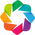

In [164]:
# first we will import the libraries we will use for time series modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
import hvplot.pandas
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display
from warnings import filterwarnings
filterwarnings('ignore')
import warnings 
warnings.filterwarnings('ignore')


# the libraries we will use for machine learning modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,TimeSeriesSplit,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,precision_recall_curve,make_scorer,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters

# the libraries we will use for regression based machine learning modeling
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# lstms,grus
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed,Bidirectional,Flatten,GRU
# prophet
# from Prophet import Prophet

# models for multivariable,VAR, VARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

# the libraries we will use for classification based machine learning modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from catboost import CatBoostClassifier

# the libraries we will use for clustering based machine learning modeling
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM




In [165]:
# define a function to upload the data using path 
def upload_data(path):
    df = pd.read_csv(path)
    return df
data = upload_data(r'C:\Users\nirro\Downloads\NAB\realKnownCause\realKnownCause\machine_temperature_system_failure.csv')
data.head()


,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [166]:
# add true anomalies to the main data frame
anomaly_points = [
        ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
        ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
        ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
        ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]
#is anomaly? : True => 1, False => 0
data['true_anomaly'] = 0
for start, end in anomaly_points:
    data.loc[((data['timestamp'] >= start) & (data['timestamp'] <= end)), 'true_anomaly'] = 1
print(data['true_anomaly'].value_counts())
print(f'the dtype of column true_anomaly is {data["true_anomaly"].dtype}')

true_anomaly
0    20431
1     2264
Name: count, dtype: int64
the dtype of column true_anomaly is int64


In [167]:
# plot the data add the anomaly = 1 - as points
data.hvplot.line(x='timestamp', 
                    y='value', 
                    color='blue', 
                    label='Normal',
                    size=5,height=400, width=800,title='machine_temperature_system_failure'
                ) * data.loc[data['true_anomaly'] == 1].hvplot.scatter(
                        x='timestamp', y='value', color='red', label='Anomaly',size=5)



:Overlay
   .Curve.Normal    :Curve   [timestamp]   (value)
   .Scatter.Anomaly :Scatter   [timestamp]   (value)


#### 3. Data Preprocessing
##### Cleaning: Handle missing values, outliers, and erroneous data entries.
##### Normalization/Standardization: Scale data appropriately if using algorithms sensitive to data scale.
##### Feature Engineering: Create time-based features (e.g., rolling averages, time lags).
##### Resampling: Adjust data frequency (hourly, daily) based on analysis needs.


In [168]:
# create different dataframes for different time periods using resample we can use 'H' for hourly, 'D' for daily.
# and 'W' for weekly, the lenght of each new dataframe will be downsaized to the time period we choose
# in this case we will use daily, weekly and hourly 
def resample_data(data,time_period_list):
    df_list = []
    for time_period in time_period_list:
        df = data[['timestamp','value','true_anomaly']].set_index('timestamp').resample(time_period).mean().reset_index()
        df_list.append(df)
    return df_list
time_period_list = ['H','D','W']
data['timestamp'] = pd.to_datetime(data['timestamp'])
df_list = resample_data(data,time_period_list)
df_hourly = df_list[0]
df_daily = df_list[1]
df_weekly = df_list[2]


#### 6. Feature Engineering and Selection (Advanced)
##### Time Series Specific Features: Lagged values, rolling window statistics.
##### Dimensionality Reduction: Techniques like PCA if necessary.
##### Relevance: Assess the importance of features in relation to the anomaly detection.


In [169]:
# add some new features 
# Loop to cycle through both DataFrames
for DataFrame in [df_hourly,df_daily,data]: # [df_hourly, df_daily]:
    # we will use the timestamp column to create new features
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['timestamp'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['timestamp'].dt.hour
    DataFrame['Day'] = DataFrame['timestamp'].dt.weekday
    DataFrame['Month'] = DataFrame['timestamp'].dt.month
    DataFrame['Year'] = DataFrame['timestamp'].dt.year
    DataFrame['Month_day'] = DataFrame['timestamp'].dt.day
    DataFrame['Lag'] = DataFrame['value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['value'].rolling(7, min_periods=1).mean()
    # DataFrame['date'] = DataFrame['timestamp'].dt.date

    # rolling average and lag features
    # we will create a rolling average,standard deviation, variance, features to smooth the data
    for num in [12,24,36]:
        DataFrame[f'rolling_average_{num}'] = DataFrame['value'].rolling(num).mean()
        DataFrame[f'rolling_std_{num}'] = DataFrame['value'].rolling(num).std()
        DataFrame[f'rolling_var_{num}'] = DataFrame['value'].rolling(num).var()
        
    
    # we will create a lag,difference,percentage change features to shift the data
    for num in [1,5,10,15]:
        DataFrame[f'lag_{num}'] = DataFrame['value'].shift(num)
        DataFrame[f'difference_{num}'] = DataFrame['value'] - DataFrame[f'lag_{num}']
        DataFrame[f'percentage_change_{num}'] = DataFrame['value'].pct_change(num)
        
    DataFrame.dropna(inplace=True)


In [170]:
# check for null values an print if a column has null values
for col in data.columns:
    if df_hourly[col].isnull().sum() > 0:
        print(f'{col} has {data[col].isnull().sum()} null values')
    


#### 4. Exploratory Data Analysis (EDA)
##### Trend Analysis: Look for underlying trends.
##### Seasonality: Identify seasonal patterns typical in water usage.
##### Correlation Analysis: Examine relationships between different variables.
##### Visualization: Use time series plots, autocorrelation plots to understand data characteristics.


In [171]:
# plot the distribution of the data, column value
(hv.Distribution(data['value']).opts(opts.Distribution(title="Overall Value Distribution",
                        xlabel="Value",
                        ylabel="Density",
                        width=700, height=300,
                        tools=['hover'],show_grid=True)
     ))


:Distribution   [value]   (Density)

In [172]:
# plot the distribution of the value column for each day of the week
# by_weekday - group the data by weekday and hour and calculate the mean of the value column
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack()

plot = hv.Distribution(by_weekday['Monday'], label='Monday'
    ) * hv.Distribution(by_weekday['Tuesday'], label='Tuesday'
    ) * hv.Distribution(by_weekday['Wednesday'], label='Wednesday'
    ) * hv.Distribution(by_weekday['Thursday'], label='Thursday'
    ) * hv.Distribution(by_weekday['Friday'], label='Friday'
    ) * hv.Distribution(by_weekday['Saturday'], label='Saturday'
    ) * hv.Distribution(by_weekday['Sunday'], label='Sunday'
    ).opts(opts.Distribution(title="machine_temperature_system_failure"))
plot.opts(opts.Distribution(
    width=800, height=300,tools=['hover'],show_grid=True, ylabel="value", xlabel="value"))

:Overlay
   .Distribution.Monday    :Distribution   [Monday]   (Density)
   .Distribution.Tuesday   :Distribution   [Tuesday]   (Density)
   .Distribution.Wednesday :Distribution   [Wednesday]   (Density)
   .Distribution.Thursday  :Distribution   [Thursday]   (Density)
   .Distribution.Friday    :Distribution   [Friday]   (Density)
   .Distribution.Saturday  :Distribution   [Saturday]   (Density)
   .Distribution.Sunday    :Distribution   [Sunday]   (Density)

In [173]:
# plot the aggragated value for each hour 
hv.Curve(df_hourly[['value','Hour']].groupby('Hour').mean()).opts(
    opts.Curve(title="Machine Temperature System Failure", xlabel="Hour", ylabel="value",
               width=700, height=300,tools=['hover'],show_grid=True))

:Curve   [Hour]   (value)

In [174]:
# plot the aggragated value for each day of the week
plot = hv.Curve(by_weekday['Monday'], label='Monday'
    ) * hv.Curve(by_weekday['Tuesday'],label='Tuesday'
    ) * hv.Curve(by_weekday['Wednesday'], label='Wednesday'
    ) * hv.Curve(by_weekday['Thursday'], label='Thursday'
    ) * hv.Curve(by_weekday['Friday'], label='Friday'
    ) * hv.Curve(by_weekday['Saturday'], label='Saturday'
    ) *hv.Curve(by_weekday['Sunday'], label='Sunday'
    ).opts(opts.Curve(title="Machine Temperature System Failure"))
plot.opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="value"))


:Overlay
   .Curve.Monday    :Curve   [Hour]   (Monday)
   .Curve.Tuesday   :Curve   [Hour]   (Tuesday)
   .Curve.Wednesday :Curve   [Hour]   (Wednesday)
   .Curve.Thursday  :Curve   [Hour]   (Thursday)
   .Curve.Friday    :Curve   [Hour]   (Friday)
   .Curve.Saturday  :Curve   [Hour]   (Saturday)
   .Curve.Sunday    :Curve   [Hour]   (Sunday)

In [175]:
# use box plot and holoview to analyze the data
# plot the box plot for each day of the week, add hue to the plot to see the anomalies
plot =  hv.BoxWhisker(df_hourly, 'Weekday', 'value', label='Machine Temperature System Failure'
    ).opts(opts.BoxWhisker(title="Machine Temperature System Failure", xlabel="Weekday", ylabel="value",
               width=700, height=300,tools=['hover'],show_grid=True))
plot.opts(opts.BoxWhisker(width=800, height=300,tools=['hover'],show_grid=True, ylabel="value"))

:BoxWhisker   [Weekday]   (value)

#### Nature of Time Series Data: 
##### Seasonal, trending, or stationary characteristics can influence the choice of model.

In [176]:
# before we start model evaluating we need to find what is the best model to use
# we need to conduct some tests to find the best model that fits our data
# the tests we will conduct are sesonal, trend, and stationarity tests:
# 1. sesonal test: we will use the seasonal_decompose function from statsmodels to decompose the data into its components
# 2. trend test: we will use the adfuller function from statsmodels to check if the data is stationary or not
# 3. stationarity test: we will use the adfuller function from statsmodels to check if the data is stationary or not
# 



--- Stationarity Analysis (ADF Test) ---
ADF Statistic: -7.358696
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Result: The series is stationary.

--- Model Recommendations ---
Recommended models: SARIMA, Holt-Winters’ seasonal method.


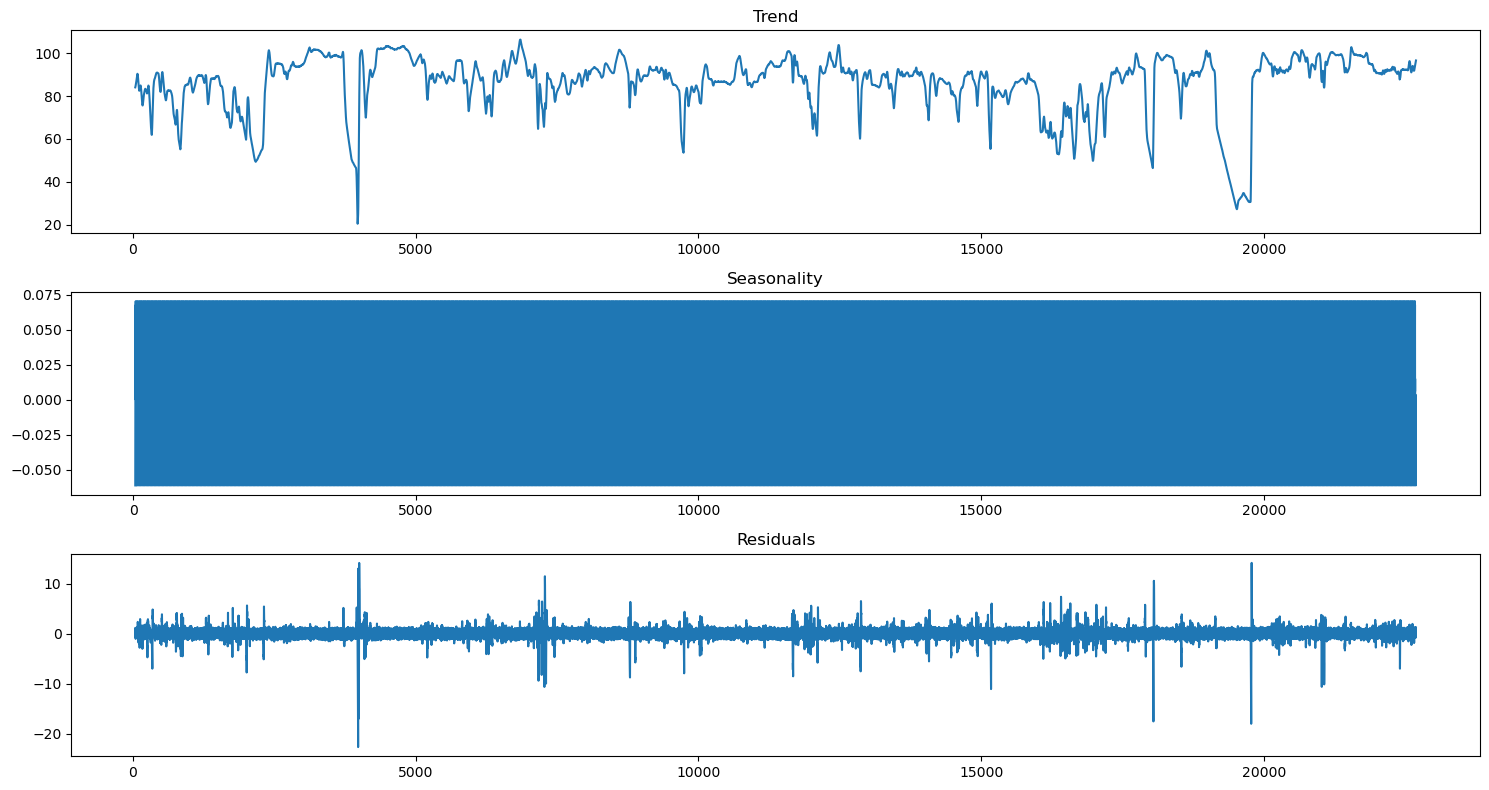

In [177]:


register_matplotlib_converters()

def check_time_series(df, column, freq):
    """
    Check, interpret, and suggest models for seasonality, trend, and stationarity in a time series.

    :param df: DataFrame containing the time series.
    :param column: The column name of the time series data.
    :param freq: The frequency of the time series (e.g., 'D' for daily).
    :return: None
    """
    # Decompose the time series
    decomposition = seasonal_decompose(df[column], model='additive', period=freq)
    
    # Plotting the decomposition
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
    decomposition.trend.plot(ax=ax1, title='Trend')
    decomposition.seasonal.plot(ax=ax2, title='Seasonality')
    decomposition.resid.plot(ax=ax3, title='Residuals')
    plt.tight_layout()

    # Check for Trend and Seasonality
    has_trend = not decomposition.trend.dropna().empty
    has_seasonality = not decomposition.seasonal.dropna().empty

    # Stationarity Check using ADF Test
    adf_test = adfuller(df[column])
    is_stationary = adf_test[1] <= 0.05

    # Interpretation of ADF Test
    print("\n--- Stationarity Analysis (ADF Test) ---")
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    if is_stationary:
        print("Result: The series is stationary.")
    else:
        print("Result: The series is not stationary.")

    # Model Recommendations
    print("\n--- Model Recommendations ---")
    if has_trend or has_seasonality:
        if has_trend and has_seasonality:
            if is_stationary:
                print("Recommended models: SARIMA, Holt-Winters’ seasonal method.")
            else:
                print("Recommended models: SARIMA (with differencing), Prophet.")
        elif has_trend:
            if is_stationary:
                print("Recommended models: ARIMA, Holt’s linear trend method.")
            else:
                print("Recommended models: ARIMA (with differencing), Prophet.")
        else:  # has_seasonality
            if is_stationary:
                print("Recommended models: Seasonal Decomposition, STL.")
            else:
                print("Recommended models: SARIMA (with differencing), Prophet.")
    else:  # neither trend nor seasonality
        if is_stationary:
            print("Recommended models: Simple Exponential Smoothing, Moving Average.")
        else:
            print("Recommended models: ARIMA (with differencing).")

# Example usage
# df should be your time series DataFrame and 'column_name' should be the column you want to check.
# The 'freq' parameter should match the frequency of your time series data (e.g., 365 for yearly data).
# check_time_series(df, 'column_name', freq)

check_time_series(data, 'value', freq=24)


### 5. Model Selection
Detecting anomalies in time series data is a critical task in various fields. Anomaly detection in time series can be approached using both supervised and unsupervised learning techniques, 
each having its own set of commonly used models:

##### regression-based anomaly detection:
in this approach we will use regression models to predict the value of the next time step, and compare it to the actual value. if the difference between the predicted and actual values is large, then we can flag an anomaly.
the difference is the error, and we need to define a threshold for the error. if the error is greater than the threshold, then we can flag an anomaly.
commun used regression models for regression-based anomaly detection are:
- SARIMA, ARIMA
- Prophet
- LSTM, GRU
- VAR

##### classification-based anomaly detection:
in this approach we will use classification models to predict whether a data point is normal or anomalous. we can use a binary classifier to label data points as normal or anomalous, or a multi-class classifier to label data points as belonging to one of several classes (e.g., normal, minor anomaly, major anomaly).
we will use known anomalies to train the model, and then use the model to predict anomalies in unseen data.
commun used classification models for classification-based anomaly detection are:
- Logistic Regression
- Random Forest
- SVM
- xgboost

##### unsupervised learning approaches:
in this approach we will use unsupervised learning models to identify patterns in the data that do not conform to expected behavior. we can use clustering algorithms to group data points into clusters based on similarity, and identify any clusters that are dissimilar to the rest of the data. alternatively, we can use density estimation algorithms to identify regions of the data that have a low probability of occurrence, and flag data points in these regions as anomalies.
commun used unsupervised learning models for anomaly detection are:
- K-means clustering
- DBSCAN
- Isolation Forest
- Local Outlier Factor
- One-class SVM
- Autoencoders


#### regression-based anomaly detection:
steps for model training:
- split the data into train and test sets
- scale the data
evaluate models performance on the training set:
for each model from a list of models we will:
    - use time series cross validation to evaluate model performance on the train set
    - train the model on the train set
    - make predictions on the test set
    - compare the predictions to the actual values
    - flag anomalies based on the difference between the predictions and actual values
    - evaluate model performance on the test set
        evaluation metrics for error:
            - mean absolute error (MAE)
            - mean squared error (MSE)
            - root mean squared error (RMSE)
        evaluation metrics for classification after thresholding:
            - precision
            - recall
            - F1 score
    save each model's performance metrics on the train set in a dataframe
return the dataframe with the models' performance metrics on the train set 


#### train test split and scaling

In [178]:

# drop the columns that we dont need for modeling
# in regression based anomaly detection we use time series data to predict the next value in the time series
# soo the only column we need is the value column
x_data_regression_approach = data['value']
y_true_regression_approach = data['true_anomaly']

# Split the data into train and test, 
# becacuse the data is time series type we will use the last 20% of the data as test data and the rest as train data
train_size = int(len(x_data_regression_approach) * 0.8)
x_train_regression_approach,x_test_regression_approach = x_data_regression_approach[:train_size], x_data_regression_approach[train_size:]
y_train_regression_approach,y_test_regression_approach = y_true_regression_approach[:train_size], y_true_regression_approach[train_size:]

# Scale the data using MinMaxScaler
# because the data are not normally distributed (a bit skew) we will use MinMaxScaler to scale the data
scaler_regression_approach = MinMaxScaler()
x_train_scaled_regression_approach = pd.DataFrame(scaler_regression_approach.fit_transform(x_train_regression_approach.to_numpy().reshape(-1, 1)), columns=['value'])
x_test_scaled_regression_approach = pd.DataFrame(scaler_regression_approach.transform(x_test_regression_approach.to_numpy().reshape(-1, 1)), columns=['value'])
# set the 'timestamp' column as index for the scaled data
x_train_scaled_regression_approach.set_index(data['timestamp'][:train_size], inplace=True)
x_test_scaled_regression_approach.set_index(data['timestamp'][train_size:], inplace=True)

# plot the scaled train and test data

hv.Curve(x_train_scaled_regression_approach).opts(
    opts.Curve(title="Machine Temperature System Failure", xlabel="timestamp", ylabel="value",
    width=700, height=300,tools=['hover'],show_grid=True)) * hv.Curve(
                   x_test_scaled_regression_approach).opts(
    opts.Curve(title="Machine Temperature System Failure", xlabel="timestamp", ylabel="value",
               width=700, height=300,tools=['hover'],show_grid=True))

:Overlay
   .Curve.I  :Curve   [timestamp]   (value)
   .Curve.II :Curve   [timestamp]   (value)

### working with ARIMA model

#### check for stationarity: using the augmented dickey-fuller test

In [179]:
# Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics
# lets check if the data is stationary or not
# we will use the adfuller function from statsmodels to check if the data is stationary or not
# the null hypothesis is that the data is not stationary
# the p-value is the probability of the null hypothesis is true
# if the p-value is lower than 0.05 we can reject the null hypothesis and say that the data is stationary
# if the p-value is higher than 0.05 we can not reject the null hypothesis and say that the data is not stationary
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p_value','#lags used','number of observations used']
    for value,label in zip(result,labels):
        print(label+':' +str(value))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
        
adfuller_test(x_train_scaled_regression_approach['value'])

ADF Test Statistic:-7.818116785545705
p_value:6.78360689659221e-12
#lags used:23
number of observations used:18104
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


#### use ACF and PACF plots to determine the order of the ARIMA model

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

<Figure size 1000x600 with 0 Axes>

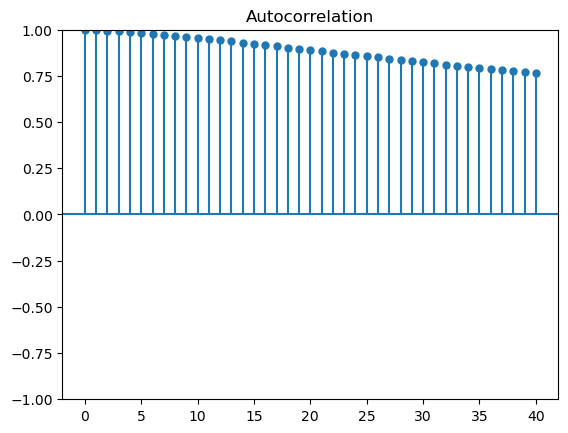

In [180]:
# Auto Correlation Function (ACF)
# The correlation between the observations at the current point in time and the observations at all previous points in time. 
# We can use ACF to determine the optimal number of MA terms. 
# We can use the ACF plot to identify the optimal number of MA terms by looking at where the plot crosses the upper confidence interval for the first time.
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ensure the data column is a Series or a NumPy array
data1 = x_train_scaled_regression_approach['value'].to_numpy()

if data1.ndim != 1:
    raise ValueError("Data is not a one-dimensional array or Series.")
else: 
    # Plotting the ACF
    plt.figure(figsize=(10, 6))
    sm.graphics.tsa.plot_acf(data1, lags=40, alpha=0.05)
    plt.title('Autocorrelation Function')
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.show()


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

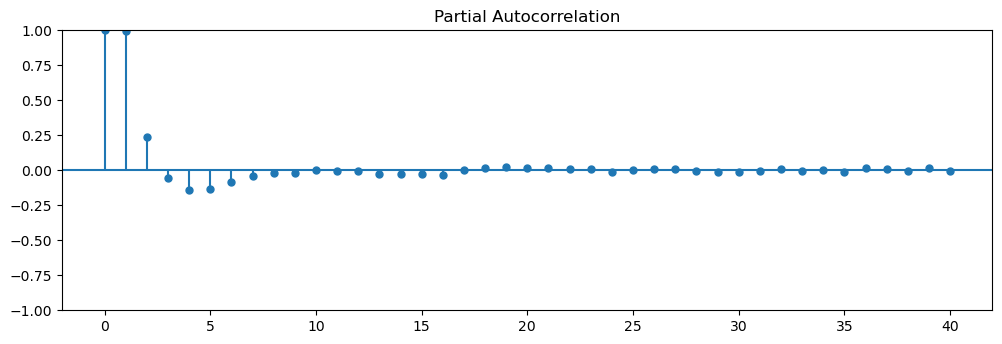

In [181]:

# Partial Auto Correlation Function (PACF)
# As the name implies, PACF is a subset of ACF. 
# PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points. 
# We can use PACF to determine the optimal number of terms to use in the AR model. 
# we can use the PACF plot to identify the optimal number of AR terms by looking at where the plot crosses the upper confidence interval for the first time.

from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x_train_scaled_regression_approach['value'].dropna(),lags=40,ax=ax2)

#### find the best model parameters using pmdarima.auto_arima

In [182]:
# using pmdarina to find the best parameters for the ARIMA model
from sympy import im
from pmdarima import auto_arima
stepwise_fit = auto_arima(x_train_scaled_regression_approach['value'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-116684.559, Time=9.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-114845.518, Time=1.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-115885.570, Time=2.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-115664.133, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-114847.507, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-116695.265, Time=9.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-116106.079, Time=3.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-115905.859, Time=4.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-116697.107, Time=4.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-116405.913, Time=4.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-116695.216, Time=4.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-116695.141, Time=8.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-116535.173, Time=5.95 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-116694.102, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                18128
Model:               SARIMAX(1, 1, 3)   Log Likelihood               58354.551
Date:                Sun, 31 Dec 2023   AIC                        -116699.103
Time:                        19:39:58   BIC                        -116660.077
Sample:                             0   HQIC                       -116686.274
                              - 18128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7330      0.018     41.415      0.000       0.698       0.768
ma.L1         -0.9947      0.019    -52.961      0.000      -1.032      -0.958
ma.L2          0.3114      0.011     29.368      0.000       0.291       0.332
ma.L3          0.0169      0.008      2.093      0.036       0.001       0.033
sigma2      9.361e-05   5.46e-07    171.444      0.000    9.25e-05    9.47e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            420020.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.58
Prob(H) (two-sided):                  0.01   Kurtosis:                        26.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

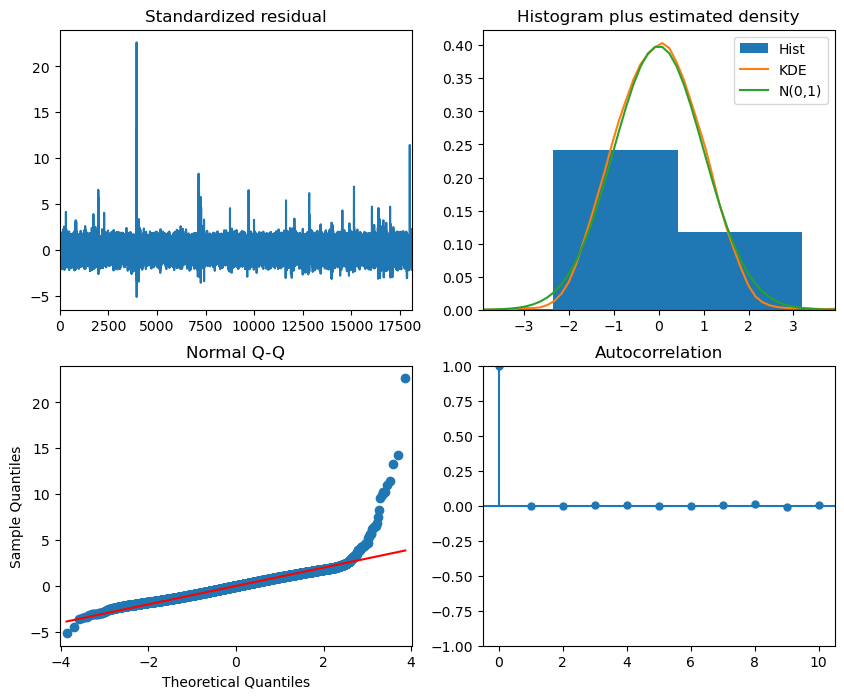

In [183]:
# plot_diagnostics
stepwise_fit.plot_diagnostics(figsize=(10,8))
plt.show()

1. Standardized Residuals Plot: The standardized residuals plot shows fluctuations around zero, which is generally good, indicating that the model doesn't have any systematic bias. However, the presence of significant spikes suggests possible outliers or extreme values that the model did not predict accurately.

2. Histogram and Estimated Density Plot: This plot includes a histogram of the residuals, a Kernel Density Estimate (KDE), and an overlay of the normal distribution. The peak of the KDE doesn't align perfectly with the normal distribution, and the histogram shows that the distribution of residuals is not symmetrical, indicating that the residuals may not be normally distributed.

3. Normal Q-Q Plot: The Q-Q plot reveals how well the residuals match a normal distribution. If residuals were normally distributed, the points would lie on the red line. The points deviate from the line, especially at the tails, indicating that the residuals have a non-normal distribution with heavier tails than would be expected if they were normal.

4. Autocorrelation Plot: The autocorrelation plot shows the correlation of the residuals with lagged versions of themselves. In a good model, we expect to see the autocorrelations close to zero, which seems to be the case here. However, the first lag shows a significant spike, which could indicate some level of autocorrelation at that lag. This might be something to look into further.

Based on these plots: 
- you may want to investigate the outliers and non-normality in more detail. This could involve examining the data for any anomalies or applying transformations to the data or residuals. 
- Moreover, if the autocorrelation at lag 1 is significant, this could imply that the model has not fully captured the temporal structure in the data.

These diagnostic plots are crucial for assessing the fit and appropriateness of the model and for guiding any steps you might take to improve the model.

### fit predict using the best model parameters

In [184]:
# use the best arima model to predict the next value in the time series
# we will use the best model we found using pmdarima
# the model is ARIMA(1,1,3)
# train the model on the train data
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(x_train_scaled_regression_approach, order=(1,1,3))

# fit the model
model_fit = model.fit()
# get the predictions on the test data
predictions = model_fit.forecast(steps=len(x_test_scaled_regression_approach))

# spot anomalies in the test data using error and threshold, 
# if the error is higher than the threshold we will mark it as anomaly, example: error > 0.1 => anomaly = 1 else anomaly = 0
error = abs(predictions - x_test_scaled_regression_approach['value'].values).values
# set a threshold at 1.96 standard deviations from the mean
threshold = np.std(error) * float(1.96)
anomaly = []
anomaly = np.where(error >= threshold, 1, 0)

# create a dataframe with timestamp as index and columns value, predictions, error and anomaly columns
df_results = pd.DataFrame(index=x_test_scaled_regression_approach.index)
df_results['value'] = x_test_scaled_regression_approach
df_results['predictions'] = predictions.values
df_results['error'] = error
df_results['anomaly'] = anomaly
df_results['true_anomaly'] = y_test_regression_approach.values
df_results.head()
                

,value,predictions,error,anomaly,true_anomaly
timestamp,,,,,
2014-02-03 21:50:00,0.896259,0.901399,0.005140,0,0
2014-02-03 21:55:00,0.902745,0.901614,0.001130,0,0
2014-02-03 22:00:00,0.902816,0.901710,0.001106,0,0
2014-02-03 22:05:00,0.903984,0.901780,0.002204,0,0
2014-02-03 22:10:00,0.887396,0.901832,0.014436,0,0


### plot the time series data with the anomalies 

In [188]:
# plot the df_results , value and anomaly columns, and add the true anomalies as points also
# make the anomaly points and the true anomaly points different soo we can see the difference
df_results.hvplot.line(x='timestamp', 
                    y='value', 
                    color='blue', 
                    label='Normal Values',
                    size=5,height=400, width=800,title='machine_temperature_system_failure'
                ) * df_results.loc[df_results['anomaly'] == 1].hvplot.scatter(
                        x='timestamp', y='value', color='red', label='Predicted Anomaly',size=20) * df_results.loc[df_results['true_anomaly'] == 1].hvplot.scatter(
                        x='timestamp', y='value', color='green', label='True Anomaly',size=1)
                            

:Overlay
   .Curve.Normal_Values       :Curve   [timestamp]   (value)
   .Scatter.Predicted_Anomaly :Scatter   [timestamp]   (value)
   .Scatter.True_Anomaly      :Scatter   [timestamp]   (value)

### evaluate the model performance on the test set,precision,recall,f1 score

In [189]:
# evqluate the model using precision, recall, f1-score
# we will use the true anomalies as the positive class and the predicted anomalies as the negative class

# precision
precision = precision_score(df_results['true_anomaly'], df_results['anomaly'])
print(f'precision is {precision}')
# recall
recall = recall_score(df_results['true_anomaly'], df_results['anomaly'])
print(f'recall is {recall}')
# f1-score
f1 = f1_score(df_results['true_anomaly'], df_results['anomaly'])
print(f'f1 score is {f1}')

# roc_auc_score
roc_auc = roc_auc_score(df_results['true_anomaly'], df_results['anomaly'])
print(f'roc_auc_score is {roc_auc}')
# confusion matrix
# confusion_matrix = confusion_matrix(df_results['true_anomaly'], df_results['anomaly'])
# print(f'confusion matrix is {confusion_matrix}')


precision is 0.9474605954465849
recall is 0.9558303886925795
f1 score is 0.951627088830255
roc_auc_score is 0.9741330460860781


### working with SARIMA model
like in the last part using the arima model.
we will investigating the SARIMA performance regarding the regression-based anomaly detection technique.
the steps for the SARIMA part are:
Working with a Seasonal Autoregressive Integrated Moving Average (SARIMA) model for regression-based anomaly detection involves several steps from data preparation to model evaluation. Here’s a step-by-step guide:

1. **Data Collection and Preparation**:
   - Gather your time series data.
   - Ensure that it is in a consistent frequency (e.g., hourly, daily, monthly).
   - Check for missing values and handle them appropriately (e.g., imputation or removal).

2. **Assumption of Stationarity**:
   - SARIMA models assume that the series is stationary. This means that its statistical properties like mean, variance, and autocorrelation are constant over time.
   - Use plots (like time series plot, ACF, and PACF) and statistical tests (like the Augmented Dickey-Fuller test) to check for stationarity.

3. **Seasonality Detection**:
   - Determine if there is a seasonal pattern in your data.
   - Plotting and seasonal decomposition can help identify seasonality.

4. **Transformation and Differencing**:
   - If the data is not stationary or if there is seasonality, apply transformations like differencing, logarithm, or seasonal differencing to stabilize the mean and variance.

5. **Model Identification**:
   - Use ACF and PACF plots to identify potential orders for the seasonal (P, D, Q) and non-seasonal (p, d, q) components of the SARIMA model.
   - The non-seasonal part captures the trend and the autocorrelation in the data, while the seasonal part captures the seasonality.

6. **Model Fitting**:
   - Fit the SARIMA model to your data using different combinations of (P, D, Q)x(p, d, q) orders.
   - You might use a grid search approach to explore a range of parameters.

7. **Model Selection**:
   - Compare models based on criteria like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or Mean Squared Error (MSE) on a validation set.
   - Choose the model with the best performance and ensure it makes theoretical sense.

8. **Diagnostic Checking**:
   - Check the residuals of your chosen model to ensure no patterns (autocorrelation) are left unmodeled.
   - Use the Ljung-Box test, residual autocorrelation plot (ACF), and Q-Q plot.

9. **Model Validation**:
   - Validate the model using the holdout sample or through cross-validation.
   - Check the forecasting performance against known data.

10. **Anomaly Detection**:
    - With the model fitted, forecast future points and compare these forecasts to actual observations.
    - Points where the actual values deviate significantly from the forecasts (beyond a chosen threshold) can be considered anomalies.

11. **Threshold Setting**:
    - Set a threshold for anomaly detection based on standard deviation, confidence intervals, or domain-specific requirements.
    - You may want to set different thresholds for detecting minor vs. major anomalies.

12. **Implementation and Monitoring**:
    - Implement the model in a production environment.
    - Continuously monitor its performance, recalibrating as necessary when new data becomes available.

Before fitting a SARIMA model, you should ensure that:
- The time series data is as clean and complete as possible.
- You have a good understanding of the data's frequency and any potential seasonal patterns.
- The data has been transformed or differenced as needed to meet the stationarity assumption.

Finally, it's important to note that anomaly detection thresholds can be set in various ways, and the chosen method should be based on the specific context and requirements of the application.

### step 6: model fitting
we already did steps 1-5 in the previous part, so we will start from step 6.
we will use the pmdarima.auto_arima function to find the best model parameters.
the pmdarima.auto_arima function uses a stepwise approach to search multiple combinations of p,d,q,P,D,Q parameters and chooses the best model that has the least AIC.
the pmdarima.auto_arima function takes the following parameters:
- m: the number of periods in each season (e.g., 12 for monthly data, 4 for quarterly data, 7 for daily data with a weekly cycle).
- max_p: the maximum number of non-seasonal AR parameters.
- max_d: the maximum number of non-seasonal differences.
- max_q: the maximum number of non-seasonal MA parameters.
- max_P: the maximum number of seasonal AR parameters.
- max_D: the maximum number of seasonal differences.
- max_Q: the maximum number of seasonal MA parameters.
- max_order: the maximum sum of the non-seasonal AR and MA parameters.



In [191]:
# find the best parameters for using pmdarima.auto_arima

# define a function to find the best parameters for the SARIMA model
# we will use the auto_arima function from pmdarima to find the best parameters for the SARIMA model
a
def find_best_parameters_sarima(data):
    stepwise_fit = auto_arima(data, trace=True,seasonal=True, m=24,suppress_warnings=True)
    stepwise_fit.summary()
    return stepwise_fit
find_best_parameters_sarima(x_train_scaled_regression_approach['value'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-116684.752, Time=53.07 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-114845.518, Time=1.92 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-115888.898, Time=18.43 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-115707.964, Time=25.60 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-114847.507, Time=1.68 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-116686.464, Time=47.45 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-116684.559, Time=10.86 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-116686.937, Time=272.27 sec


MemoryError: Unable to allocate 374. MiB for an array with shape (52, 52, 18128) and data type float64

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, VARMAX
from sklearn.linear_model import LinearRegression

def create_lagged_features(data, lag=4):
    # Create lagged features for a time series dataset
    X, y = [], []
    for i in range(lag, len(data)):
        # Convert the slice of data to a NumPy array and then flatten it
        X.append(data.iloc[i-lag:i].values.flatten()) 
        y.append(data.iloc[i])
    return np.array(X), np.array(y)


def evaluate_model_performance(x_data, y_data, list_of_models, threshold_anomaly_error, lag=4, train_size=0.8):
    # Split the data into training and testing sets chronologically
    split_index = int(len(x_data) * train_size)
    x_train, x_test = x_data[:split_index], x_data[split_index:]
    y_train, y_test = y_data[:split_index], y_data[split_index:]

    # Create lagged features for training and testing
    X_train, y_train_target = create_lagged_features(x_train, lag)
    X_test, y_test_target = create_lagged_features(x_test, lag)

    results = []
    for model_info in list_of_models:
        model_class, model_args = model_info
        # Instantiate model
        if model_class in [ARIMA, SARIMAX]:
            model = model_class(y_train_target, **model_args)
        else:
            model = model_class(*model_args)
        
        # Fit and predict
        if model_class in [ARIMA, SARIMAX]:
            model = model.fit()
            predictions = model.predict(start=split_index, end=len(y_data)-1)
        else:
            model.fit(X_train, y_train_target)
            predictions = model.predict(X_test)
        
        # Calculate error and flag anomalies
        error = abs(predictions - y_test_target)
        anomalies = np.where(error > threshold_anomaly_error, 1, 0)
        
        # Evaluation metrics
        y_test_target, anomalies = y_test_target.astype(int), anomalies.astype(int)
        print(f'y_test_target dtype: {y_test_target.dtype}')
        print(f'anomalies dtype: {anomalies.dtype}')
        # lets count the distinct values
        print(f'y_test_target distinct values: {np.unique(y_test_target)}')
        print(f'anomalies distinct values: {np.unique(anomalies)}')
        
        
        precision = precision_score(y_test_target, anomalies)
        recall = recall_score(y_test_target, anomalies)
        f1 = f1_score(y_test_target, anomalies)
        # auc = roc_auc_score(y_test_target, anomalies)

        # Store results
        results.append({
            'Model': model_class.__name__,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
            # 'AUC': auc
        })

    return pd.DataFrame(results)

# Example usage
list_of_models = [
    (LinearRegression, ()),
    (ARIMA, {'order': (1,0,0)}),
    (SARIMAX, {'order': (1,0,0)}),
    (VAR, ()),
    (VARMAX, {'order': (1,1)})
]
# print the value counts of y
# print(y_train_regression_approach.value_counts())

# Assuming x_scaled and y are defined as your full dataset
models_results_df = evaluate_model_performance(
    x_data=x_train_scaled_regression_approach,
    y_data=y_train_regression_approach,
    list_of_models=list_of_models,
    threshold_anomaly_error=0.01,
    lag=4,
    train_size=0.8
)




learn about autoencoders:
https://neptune.ai/blog/autoencoders-case-study-guide


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.api import VAR, VARMAX
# from sklearn.linear_model import LinearRegression  # Example for a simple regression model

# def create_lagged_features(data, lag=4):
#     X, y = [], []
#     for i in range(lag, len(data)):
#         X.append(data[i-lag:i])
#         y.append(data[i])
#     return np.array(X), np.array(y)

# def evaluate_model_performance(y_train_evaluate, list_of_model_constructors, threshold_anomaly_error, lag=4):
#     cvts = TimeSeriesSplit(n_splits=5)
#     results = []

#     for model_constructor in list_of_model_constructors:
#         precision_scores, recall_scores, f1_scores, auc_scores = [], [], [], []

#         for train_index, test_index in cvts.split(y_train_evaluate):
#             # Create model instance (specifically for ARIMA and SARIMAX)
#             if model_constructor in [ARIMA, SARIMAX]:
#                 model = model_constructor(y_train_evaluate[train_index], order=(1,0,0))  # Example order
#             else:
#                 model = model_constructor()

#             # Creating lagged features
#             X_train, y_train = create_lagged_features(y_train_evaluate[train_index], lag)
#             X_test, y_test = create_lagged_features(y_train_evaluate[test_index], lag)

#             # Fit the model
#             if isinstance(model, (ARIMA, SARIMAX)):
#                 model = model.fit()
#             else:
#                 model.fit(X_train, y_train)

#             # Predict on the test set
#             if isinstance(model, (ARIMA, SARIMAX)):
#                 predictions = model.predict(start=test_index[lag], end=test_index[-1]-1)
#             else:
#                 predictions = model.predict(X_test)

#             # Calculate error and anomaly flag
#             error = abs(predictions - y_test)
#             anomalies = np.where(error > threshold_anomaly_error, 1, 0)

#             # Calculate the metrics
#             precision = precision_score(y_test, anomalies)
#             recall = recall_score(y_test, anomalies)
#             f1 = f1_score(y_test, anomalies)
#             auc = roc_auc_score(y_test, anomalies)

#             precision_scores.append(precision)
#             recall_scores.append(recall)
#             f1_scores.append(f1)
#             auc_scores.append(auc)

#         # Aggregate results
#         model_name = model_constructor.__name__ if isinstance(model_constructor, type) else model_constructor.__class__.__name__
#         results.append({
#             'Model': model_name,
#             'Precision': np.mean(precision_scores),
#             'Recall': np.mean(recall_scores),
#             'F1 Score': np.mean(f1_scores),
#             'AUC': np.mean(auc_scores)
#         })

#     return pd.DataFrame(results)

# # Example usage
# list_of_model_constructors = [
#     # LinearRegression,
#     lambda y: ARIMA(y, order=(1,0,0)),
#     lambda y: SARIMAX(y, order=(1,0,0)),
#     # VAR,
#     # VARMAX
# ]
# # models_results_df = evaluate_model_performance(
# #     y_train_evaluate=y_train_regression_approach,
# #     list_of_model_constructors=list_of_model_constructors,
# #     threshold_anomaly_error=0.1,
# #     lag=4
# # )
# y_train_regression_approach.shape

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, VARMAX
from sklearn.linear_model import LinearRegression

def create_lagged_features(data, lag=4):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

def evaluate_model_performance(x_train_evaluate, y_train_evaluate, list_of_models, threshold_anomaly_error, lag=4):
    cvts = TimeSeriesSplit(n_splits=5)
    results = []

    for model_info in list_of_models:
        model_class, model_args = model_info
        precision_scores, recall_scores, f1_scores, auc_scores = [], [], [], []

        for train_index, test_index in cvts.split(x_train_evaluate):
            # Create model instance
            if model_class in [ARIMA, SARIMAX]:
                model = model_class(y_train_evaluate.iloc[train_index], **model_args)
            else:
                model = model_class(*model_args)

            # Creating lagged features
            X_train, y_train = create_lagged_features(x_train_evaluate.iloc[train_index].values, lag)
            X_test, y_test = create_lagged_features(x_train_evaluate.iloc[test_index].values, lag)

            # Fit the model
            if model_class in [ARIMA, SARIMAX]:
                model = model.fit()
            else:
                model.fit(X_train, y_train)

            # Predict on the test set
            if model_class in [ARIMA, SARIMAX]:
                predictions = model.predict(start=test_index[lag], end=test_index[-1]-1)
            else:
                predictions = model.predict(X_test)

            # Calculate error and anomaly flag
            error = abs(predictions - y_test)
            anomalies = np.where(error > threshold_anomaly_error, 1, 0)

            # Calculate the metrics
            precision = precision_score(y_test, anomalies)
            recall = recall_score(y_test, anomalies)
            f1 = f1_score(y_test, anomalies)
            auc = roc_auc_score(y_test, anomalies)

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            auc_scores.append(auc)

        # Aggregate results
        results.append({
            'Model': model_class.__name__,
            'Precision': np.mean(precision_scores),
            'Recall': np.mean(recall_scores),
            'F1 Score': np.mean(f1_scores),
            'AUC': np.mean(auc_scores)
        })

    return pd.DataFrame(results)

# Assuming you have defined x_train_scaled_regression_approach, y_train_regression_approach
# And assuming you have a list of models to evaluate
list_of_models = [
    (LinearRegression, ()),
    (ARIMA, {'order': (1,0,0)}),
    (SARIMAX, {'order': (1,0,0)}),
    (VAR, ()),
    (VARMAX, {'order': (1,1)})
]

# # Now call the function with all required arguments
# models_results_df = evaluate_model_performance(
#     x_train_evaluate=x_train_scaled_regression_approach,
#     y_train_evaluate=y_train_regression_approach,
#     list_of_models=list_of_models,
#     threshold_anomaly_error=0.1,
#     lag=4
# )
y_train_regression_approach.shape

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score

# def evaluate_models(models, X_train, y_train, X_test, y_test, n_splits=5, threshold_factor=2):
#     """
#     Evaluate a list of models using time series cross-validation and anomaly detection.

#     Parameters:
#     models: List of regression models to be trained.
#     X_train, y_train: Training data.
#     X_test, y_test: Test data.
#     n_splits: Number of splits for time series cross-validation.
#     threshold_factor: Factor to set anomaly threshold.

#     Returns:
#     DataFrame with each model's performance metrics on the train set.
#     """
#     results = []

#     for model in models:
#         model_name = type(model).__name__
#         tscv = TimeSeriesSplit(n_splits=n_splits)
#         mae, mse, rmse = [], [], []

#         for train_index, val_index in tscv.split(X_train):
#             X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#             y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
            
#             model.fit(X_train_fold, y_train_fold)
#             predictions = model.predict(X_val_fold)

#             mae.append(mean_absolute_error(y_val_fold, predictions))
#             mse.append(mean_squared_error(y_val_fold, predictions))
#             rmse.append(np.sqrt(mean_squared_error(y_val_fold, predictions)))

#         # Train the model on the full training set and predict on the test set
#         model.fit(X_train, y_train)
#         test_predictions = model.predict(X_test)
#         residuals = np.abs(y_test - test_predictions)
#         threshold = np.mean(residuals) + threshold_factor * np.std(residuals)
#         anomalies = residuals > threshold
#         actual_anomalies = residuals > threshold

#         precision = precision_score(actual_anomalies, anomalies)
#         recall = recall_score(actual_anomalies, anomalies)
#         f1 = f1_score(actual_anomalies, anomalies)

#         results.append({
#             'Model': model_name,
#                 'MAE (Train)': np.mean(mae),
#                 'MSE (Train)': np.mean(mse),
#                 'RMSE (Train)': np.mean(rmse),
#             'Precision (Test)': precision,
#             'Recall (Test)': recall,
#             'F1 Score (Test)': f1
#         })

#     return pd.DataFrame(results)

# # Example usage:
# # models = [Model1(), Model2(), ...]
# # results_df = evaluate_models(models, X_train, y_train, X_test, y_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

def evaluate_models_cv_time_series(dataset_x, dataset_y, list_of_models, n_splits):
    # DataFrame to store results
    results_list = []

    # TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Loop through the list of models
    for model in list_of_models:
        model_name = model.__class__.__name__

        # Calculate the cross-validation score for each metric
        precision = cross_val_score(model, dataset_x, dataset_y, cv=tscv, scoring=make_scorer(precision_score, average='binary'))
        recall = cross_val_score(model, dataset_x, dataset_y, cv=tscv, scoring=make_scorer(recall_score, average='binary'))
        f1 = cross_val_score(model, dataset_x, dataset_y, cv=tscv, scoring=make_scorer(f1_score, average='binary'))

        # Compile results into a dictionary and add to DataFrame
        results_list.append({
            'Model': model_name,
            'Precision': np.mean(precision),
            'Recall': np.mean(recall),
            'F1 Score': np.mean(f1)
        })
    results_df = pd.DataFrame(results_list)


    return results_df

# Example usage
# Assuming dataset_x, dataset_y, and list_of_models are defined
model_list = [LogisticRegression(), 
              RandomForestClassifier(), 
              XGBClassifier(verbose=False), 
              CatBoostClassifier(verbose=False)]
results = evaluate_models_cv_time_series(x_train_scaled, y_train, model_list, 5)
results.head()

## working with SARIMA model
working with a SARIMA model is crucial as it involves determining the appropriate parameters for the model. This requires understanding the properties of the time series, such as stationarity, seasonality, and autocorrelation.

### Check for Stationarity
A time series needs to be stationary for ARIMA-based models. This means its statistical properties (like mean and variance) should be constant over time. The Augmented Dickey-Fuller (ADF) test can be used to check stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Apply ADF test on the series
check_stationarity(df['Passengers'])
# If the series is not stationary, you might need to difference it. This is the d component in SARIMA.

### Seasonal Decomposition
Seasonal decomposition allows you to observe the underlying trend, seasonality, and residuals in the data.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()


### Determine d and D
d: The number of differences required to make the time series stationary.
D: The number of seasonal differences required to remove seasonality.
These can initially be determined by visual inspection and confirmed by ensuring stationarity post-differencing.

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots
ACF and PACF plots help determine the order of AR (p) and MA (q) terms.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Passengers'], lags=50)
plot_pacf(df['Passengers'], lags=50)
plt.show()

### Parameter Selection for SARIMA
Based on the ACF and PACF plots, decide the parameters. You may also use grid search to find the optimal set of parameters that minimize a chosen metric (like AIC).

### Fit the SARIMA Model
Once you have chosen the parameters, fit the SARIMA model.
let's go through the process of using a SARIMA model for anomaly detection in a time series dataset with Python. In this example, we'll use the SARIMA model to fit the data, then identify points where the actual values significantly deviate from the model's predictions as anomalies. 


In [ ]:

### Step 1: Fit a SARIMA Model
# Fit SARIMA model
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
sarima_model = SARIMAX(y_train, order=sarima_order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit(disp=False)

### Step 2: Predict and Calculate Residuals
# Now, we predict future values using our model and calculate the residuals (the difference between actual and predicted values).

# Predict
y_pred = sarima_model_fit.forecast(len(y_test))

# Calculate residuals
residuals = y_test - y_pred

### Step 3: Determine Anomalies
#Anomalies are determined based on the magnitude of the residuals. 
# We can set a threshold to flag large residuals as anomalies. 
# A common approach is to use a multiple of the standard deviation.

threshold = 2 * residuals.std()
print(f"Threshold for anomaly detection: {threshold}")

# Detect anomalies
anomalies = residuals[abs(residuals) > threshold]
print("Anomalies detected:")
print(anomalies)

### Step 4: Visualize the Results
#It's often helpful to visualize the anomalies in the context of the original data.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.scatter(anomalies.index, y_test[anomalies.index], color='r', label='Anomaly')
plt.legend()
plt.show()

### Conclusion
#This code will fit a SARIMA model to your time series data, 
# predict future values, and then identify and visualize anomalies based on the deviation of the actual values from the predictions. 
# Adjust the model parameters and the anomaly detection threshold according to the specific characteristics and scale of your dataset.

### For multivariate time series forecasting
where you have multiple time-dependent variables and you want to predict one (or more) of them using not only its own past values but also the values of other variables, you would need to use different approaches or models. Some of these include:

1. VAR (Vector Autoregression): VAR is a common approach for modeling multivariate time series. It captures the linear interdependencies among multiple time series.

2. VARIMA (Vector Autoregressive Integrated Moving Average): This is an extension of VAR for non-stationary time series, incorporating the differencing (integration) part of ARIMA.

3. Machine Learning Approaches: Models like Random Forests, Gradient Boosting Machines (e.g., XGBoost), or Support Vector Machines can be used with feature engineering. You would create lagged features for each variable and use these as inputs to predict your target variable.

4. Deep Learning Approaches: Techniques like LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Units) in neural networks can handle multivariate time series. They can learn complex patterns from sequences of data and are particularly useful for larger datasets.

5. Hybrid Models: Combining traditional time series models with machine learning approaches. For example, you could use ARIMA to model one variable and machine learning models to incorporate the influence of other variables.

Causal Models and Structural Time Series Models: These models, like Bayesian Structural Time Series, allow incorporating external regressors and can capture complex behaviors in multivariate time series.



#### Unsupervised Anomaly Detection

#### Unsupervised techniques do not require labeled data and are useful when you don't have predefined labels for anomalies. They typically identify anomalies by looking for data points that deviate significantly from the majority of the data.

##### 1. **Clustering-Based Models**:
#####   - **K-Means Clustering**: Anomalies are identified as data points that are far from the centroids of their nearest clusters.
#####   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Identifies dense clusters and treats points in low-density regions as outliers.

##### 2. **Statistical Models**:
#####   - **Seasonal Decomposition**: Looks for anomalies by decomposing the series into trend, seasonality, and residual components.

##### 3. **Neural Network Based Models**:
#####  - **Autoencoders**: Trained to reconstruct the input data, and anomalies are detected based on the reconstruction error.
#####   - **Generative Adversarial Networks (GANs)**: Can be adapted for anomaly detection by evaluating the reconstruction error.

##### 4. **Isolation Forest**: A tree-based model that isolates anomalies instead of profiling normal data points.

##### 5. **One-Class SVM**: Designed to identify anomalies in high-dimensional datasets.

##### Hybrid Models
##### Hybrid models combine features of both supervised and unsupervised methods. For example, semi-supervised models use a small amount of labeled data along with a larger set of unlabeled data.

### Choice of Model

##### The choice of model depends on several factors:
##### - **Availability of Labeled Data**: If labeled data is available, supervised methods are preferred.
##### - **Nature of Time Series Data**: Seasonal, trending, or stationary characteristics can influence the choice of model.
##### - **Complexity of Data**: High-dimensional and complex data might require more sophisticated models like neural networks.
##### - **Resource Constraints**: Some models require more computational resources and data than others.

##### In practice, it's common to experiment with multiple models and approaches to find the one that works best for the specific characteristics of the time series data being analyzed.

In [ ]:
# for the chosen models create a function to make predictions
# the results(anomaly score and predict value in 1 for anomaly,0 for regular point) will be stored in a dataframe with the actual values and the predicted values,and the model name

def predict_clustering_model(model,df):
    # make predictions
    df['anomaly_score'] = model.decision_function(df[['value']])
    df['predict'] = model.predict(df[['value']])
    return df
list_clustering_models = [IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0,behaviour="new"),
                          ]

In [ ]:
def run_isolation_forest(model_data: pd.DataFrame, contamination, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )
    IF.fit(model_data)
    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    score = IF.decision_function(model_data)
    return output, score

# drop true_anomaly	and Weekday column from the data that enter the model
model_data = df_hourly[df_hourly.drop(['true_anomaly','Weekday'],axis=1).columns.to_list()].set_index('timestamp').dropna()

outliers, score = run_isolation_forest(model_data,contamination=0.004)
df_hourly = (df_hourly
             .assign(Outliers = outliers)
             .assign(Score = score)
            )



In [ ]:
# def outliers(thresh):
#     print(f'Number of Outliers below Anomaly Score Threshold {thresh}:')
#     print(len(df_hourly.query(f"Outliers == 1 & Score <= {thresh}")))

tooltips = [('Weekday', '@Weekday'),('Day', '@Month_day'),('Month', '@Month'),('Value', '@value'),('Average Value', '@value_Average'),('Outliers', '@Outliers')]
hover = HoverTool(tooltips=tooltips)
# Create hover tool
hover = HoverTool(tooltips=[("Timestamp", "@timestamp"), ("Value", "@value")])
# Create a curve from the DataFrame
curve = hv.Curve(df_hourly).opts(opts.Curve(title="Machine Temperature System Failure", xlabel="",  ylabel="Value", height=300, responsive=True,tools=[hover, 'box_select', 'lasso_select', 'tap'],show_grid=True))
# Points for outliers
outlier_points = hv.Points(df_hourly[df_hourly["Outliers"] == 1]).opts(size=10, color='red')
# Points for anomalies
anomaly_points = hv.Points(df_hourly[df_hourly["true_anomaly"] == 1]).opts(size=5, color='blue')
# Overlay the points on the curve
plot = curve * outlier_points * anomaly_points

# Display the plot
plot


In [ ]:
# evaluate the model performance using the confusion matrix, precision, recall, and f1 score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
df_hourly.dropna(inplace=True)
df_hourly['Outliers'] = df_hourly['Outliers'].astype(int)
df_hourly['true_anomaly'] = df_hourly['true_anomaly'].astype(int)

# confusion matrix
print(f"confusion_matrix:\n {confusion_matrix(df_hourly['true_anomaly'], df_hourly['Outliers'])}\n")
# precision
print(f"precision_score: {precision_score(df_hourly['true_anomaly'], df_hourly['Outliers'])}\n")

# recall
print(f"recall_score: {recall_score(df_hourly['true_anomaly'], df_hourly['Outliers'])}\n")
# f1 score
print(f"f1_score: {f1_score(df_hourly['true_anomaly'], df_hourly['Outliers'])}\n")




In [ ]:
import pandas as pd
import numpy as np
import holoviews as hv
from holoviews import opts

def plot_confusion_matrix(df, true_col, pred_col):
    """
    Plot a prettier confusion matrix using Holoviews.

    :param df: DataFrame containing the actual and predicted labels.
    :param true_col: Column name for true labels.
    :param pred_col: Column name for predicted labels.
    :return: Holoviews object for the confusion matrix.
    """
    # Calculate confusion matrix elements
    tp = df[(df[true_col] == 1) & (df[pred_col] == 1)].shape[0]
    fp = df[(df[true_col] == 0) & (df[pred_col] == 1)].shape[0]
    tn = df[(df[true_col] == 0) & (df[pred_col] == 0)].shape[0]
    fn = df[(df[true_col] == 1) & (df[pred_col] == 0)].shape[0]

    # Create a matrix and labels
    matrix = np.array([[tp, fp], [fn, tn]])
    labels = ['Positive', 'Negative']

    # Create Holoviews HeatMap
    heatmap = hv.HeatMap((labels, labels, matrix)).opts(
        opts.HeatMap(tools=['hover'], xaxis='top', colorbar=True, cmap='Blues',
                     fontsize={'title': 16, 'labels': 14, 'xticks': 12, 'yticks': 12},width=600, height=400,
                     xlabel='Predicted Label', ylabel='True Label', title='Confusion Matrix'))

    # Add text annotations for counts
    text = hv.Labels({('Positive', 'Positive'): tp, ('Positive', 'Negative'): fn,
                      ('Negative', 'Positive'): fp, ('Negative', 'Negative'): tn}).opts(
                      text_color='black', text_font_size='10pt', text_align='center')

    return heatmap * text

# Example usage of the function
hv.extension('bokeh')
confusion_matrix_plot = plot_confusion_matrix(df_hourly, 'true_anomaly', 'Outliers')
confusion_matrix_plot



#### 7. Model Training and Validation
##### Cross-Validation: Use time series cross-validation methods.
##### Hyperparameter Tuning: Optimize parameters for best performance.
##### Handling Overfitting: Regularization, dropout (for neural networks).



#### 8. Anomaly Detection Techniques
##### Threshold-based: Define thresholds for anomalies based on historical data.
##### Statistical Models: Use statistical tests for anomaly detection.
##### Machine Learning: Employ supervised/unsupervised learning for pattern recognition.



#### 9. Model Evaluation
##### Metrics: Choose appropriate metrics (e.g., precision, recall, F1-score) for anomaly detection.
##### Real-world Validation: Test the model with real-world data scenarios.